<a href="https://colab.research.google.com/github/phuongghj123/CS114.K21/blob/master/Round3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lấy dữ liệu xuống sử dụng thư viện Pandas
Sử dụng hàm read_csv

In [0]:
import pandas as pd

dataset = pd.read_csv("http://cs.uit.edu.vn/data2.txt", delimiter = ",")
dataset.columns = ["Input size", "Time"]

In [3]:
dataset.head()

,Input size,Time
0,1954367,0.152648
1,3734185,0.298548
2,5839301,0.460480
3,6343427,0.527977
4,1355574,0.098012


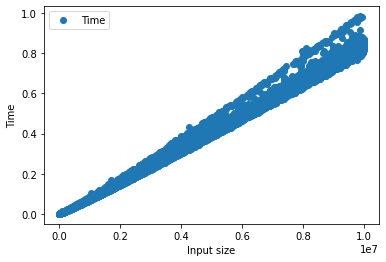

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

dataset.plot(kind = 'line', x = 'Input size', y = 'Time', style = 'o')
plt.xlabel('Input size')
plt.ylabel('Time')
plt.show()

Đưa dữ liệu về ma trận cột

In [0]:
X = dataset['Input size'].values.reshape(-1,1)
Y = dataset['Time'].values.reshape(-1,1)

Chọn model bằng cách import model từ thư viện sklearn
Lấy 80% dữ liệu trong bộ dữ liệu để training data

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
model = LinearRegression(fit_intercept=True)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [7]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Sử dụng hàm predict để dự đoán cho X_train và X_test

In [0]:
train_prediction = model.predict(X_train)
test_prediction = model.predict(X_test)

Đưa ra kết quả so sánh giữa giá trị y cho trước và giá trị y dự đoán

In [9]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': test_prediction.flatten()})
df

,Actual,Predicted
0,0.082504,0.078188
1,0.713418,0.713665
2,0.144805,0.149980
3,0.334075,0.336919
4,0.382199,0.386640
...,...,...
14218,0.615344,0.612838
14219,0.144406,0.147042
14220,0.481747,0.485825
14221,0.588001,0.572437


Biểu đồ so sánh giá trị y cho trước và giá trị y dự đoán

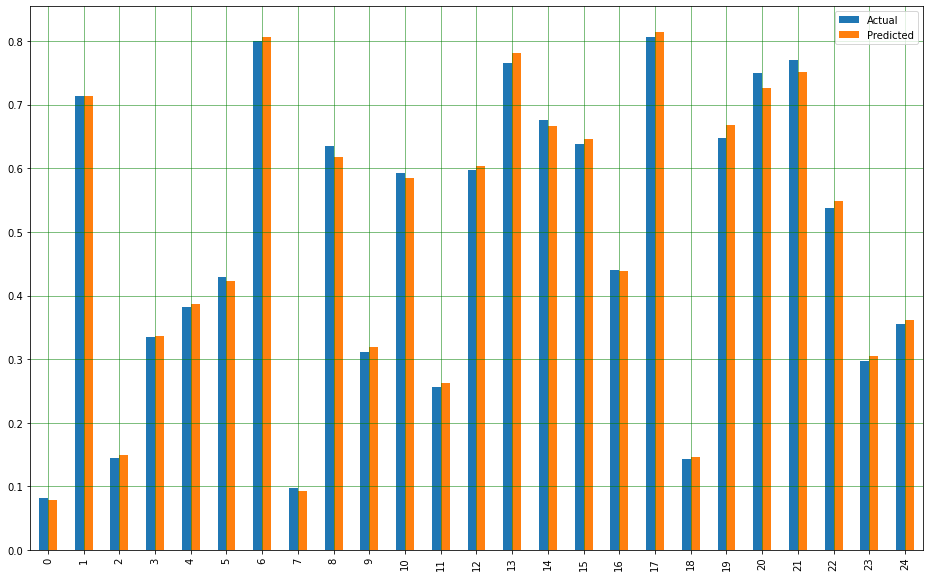

In [10]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Đưa ra độ chính xác của model
Model dự đoán tốt vì giá trị Mean Squared Error xấp xỉ 0.00015

In [11]:
import sklearn.metrics as metrics
print('Mean Squared Error:', metrics.mean_squared_error(y_test, test_prediction))
print('Train: ', metrics.r2_score(y_train, train_prediction))
print('Test: ', metrics.r2_score(y_test, test_prediction))

Mean Squared Error: 0.00015754095835503407
Train:  0.9976524406989918
Test:  0.997352628922157


In ra các giá trị w1 và w0 tương ứng

In [12]:
print(model.coef_)
print(model.intercept_)

[[8.45430554e-08]]
[-0.01585469]


**Round 3**

Đưa dữ liệu mới data3.txt vào sử dụng hàm read_csv trong thư viện pandas

In [13]:
import pandas as pd
dataset3 = pd.read_csv("http://cs.uit.edu.vn/data3.txt", delimiter=",")
dataset3.columns = ["Input_size", "Time"]
dataset3.head()

,Input_size,Time
0,37395246,3.92089
1,36610827,3.21540
2,29555651,2.54506
3,25928216,2.21831
4,30423112,2.61376


Đưa dữ liệu về ma trận cột

In [0]:
X_3 = dataset3["Input_size"].values.reshape(-1,1)
Y_3 = dataset3["Time"].values.reshape(-1,1)

Sử dụng model đã train ở Round 2 để đánh giá dữ liệu cho Data 3

In [15]:
y_3_pred = model.predict(X_3)
print ("Mean Squared Error: ", metrics.mean_squared_error(Y_3, y_3_pred))

Mean Squared Error:  0.02068386138981177


Ta thấy giá trị MSE (Mean Squared Error) ở Data 3 lớn hơn so với Data 2, vậy kết quả dự đoán tệ hơn

Xây dựng model mới sử dụng phương pháp tăng số features

In [0]:
import numpy as np
dataset3["Input_size^2"] = dataset3["Input_size"]**2
dataset3["Input_size_log"] = dataset3["Input_size"]*np.log(dataset3["Input_size"])
columns = ["Input_size", "Input_size^2", "Input_size_log", "Time"]
dataset3 = dataset3.reindex(columns = columns)

In [17]:
dataset3.head()

,Input_size,Input_size^2,Input_size_log,Time
0,37395246,1398404423400516,6.520629e+08,3.92089
1,36610827,1340352653623929,6.376088e+08,3.21540
2,29555651,873536506033801,5.084100e+08,2.54506
3,25928216,672272384942656,4.426165e+08,2.21831
4,30423112,925565743764544,5.242119e+08,2.61376


In [0]:
X_3_new = dataset3.iloc[:,0:3]
Y_3_new = dataset3.iloc[:,3]

Tiến hành chia dữ liệu theo tỷ lệ train/test = 80/20

In [0]:
X_3_train, X_3_test, Y_3_train, Y_3_test = train_test_split(X_3_new, Y_3_new, test_size=0.2)

In [0]:
model3 = LinearRegression()
model3.fit(X_3_train, Y_3_train)
Y_3_new_pred = model3.predict(X_3_test)

In [23]:
print("Mean Squared Error: ", metrics.mean_squared_error(Y_3_test, Y_3_new_pred))

Mean Squared Error:  0.0028407372514420055


Model mới có performance tốt hơn so với model cũ (00284 < 0.020683)

Vì có thêm feature giúp kết quả dự đoán cải thiện hơn